# Understanding our Data

In [43]:
import os
from pprint import pprint, pformat

import numpy as np

from IPython.display import display, Markdown, Latex

In [3]:
data_path = "/Volumes/T7/University/Polytechnique/INF634-Advanced-Computer-Vision/data"

In [7]:
sub_folders = [f for f in os.listdir(data_path) if f[0] != "."]
pprint(sub_folders)

['fbank_pitch_181506',
 'how2-300h-v1',
 'how2-300h-v1-pt',
 'how2-release',
 'resnext101-action-avgpool-300h',
 'text',
 'video_action_features']


## Folder: Video Action Features
`video_action_features`

In [13]:
folder_name = "video_action_features"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[-4:] == ".npy"]
n_videos = len(sub_path_folders)

print(f"{n_videos} video files...\n")

for video_name in sub_path_folders[-10:]:
    video_path = os.path.join(sub_path, video_name)
    with open(video_path, "rb") as f:
        video = np.load(f)
        print(f"Video '{video_name}' has shape {np.shape(video)}")

Reading folder: video_action_features

72983 video files...

Video 'fG5LhLDYT1U.npy' has shape (246, 2048)
Video '_UrvfGn6lF8.npy' has shape (320, 2048)
Video 'qKpBtUSQoBo.npy' has shape (257, 2048)
Video 'gBBDll2rjXM.npy' has shape (206, 2048)
Video 'tdCNpLTGuTk.npy' has shape (161, 2048)
Video 't3itBu2aNCM.npy' has shape (120, 2048)
Video 'KHVUsILSS4E.npy' has shape (146, 2048)
Video 'bX0Zpf-rEgc.npy' has shape (133, 2048)
Video 'bJdeMjRmU4U.npy' has shape (122, 2048)
Video '2iwcFiIbkn8.npy' has shape (157, 2048)


## Folder: text
`text`, transcriptions and descriptions of videos

In [26]:
folder_name = "text"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]
print(f"Accessible data are located at folders {sub_path_folders[-10:]}\n")

sum_folder_path = os.path.join(sub_path, "sum_train")
sum_files = [f for f in os.listdir(sum_folder_path) if f[0] != "."]
print(f"Accessible files are {sum_files} in 'sum_train'\n")

Reading folder: text

Accessible data are located at folders ['sum_devtest', 'sum_cv', 'sum_train']

Accessible files are ['tran.tok.txt', 'desc.tok.txt'] in 'sum_train'



In [28]:
txt_file = os.path.join(sum_folder_path, "tran.tok.txt")
print("Reading: 'tran.tok.txt'\n")
with open(txt_file, "r") as f:
    line = f.readline()
    print(line)

Reading: 'tran.tok.txt'

DOx-0ZSIZkA hi everybody i 'm john graden from the martial arts teacher 's association and johngraden.com . one of the questions i have been asked through the years how do you choose a martial art ? it really varies it depends on what your goal is . are you trying to get in better shape , do you want to learn self defense , do you want to compete or are you just interested in the mental benefits of the martial arts offer you , mental benefits such as self confidence , self discipline , self control , respect , so there is a lot of variables . in my mind when people say what style is best , what style should i do the only style that is really important is the teaching style of the instructor . so how do you choose a good martial arts ? it is really more about choosing a good martial arts instructor , it 's about choosing a good martial arts school , so when you are going to make the decision make sure first you know what your goal is . if you really want a stron

In [29]:
txt_file = os.path.join(sum_folder_path, "desc.tok.txt")
print("Reading: 'desc.tok.txt'\n")

with open(txt_file, "r") as f:
    line = f.readline()
    print(line)

Reading: 'desc.tok.txt'

DOx-0ZSIZkA when choosing a martial art , choose an informed and talented instructor . choose a martial arts fighting system with tips from a martial arts teacher in this free self-defense video .



## Folder: ResNext101 
`resnext101-action-avgpool-300h`

In [34]:
folder_name = "resnext101-action-avgpool-300h"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]
print(f"Accessible data are located at folders {sub_path_folders[-10:]}\n")

file = "train.npy"
npy_path = os.path.join(sub_path, file)
with open(npy_path, "rb") as f:
    avgpool = np.load(f)
    print(f"Shape of '{file}' is {np.shape(avgpool)}")

Reading folder: resnext101-action-avgpool-300h

Accessible data are located at folders ['train.npy', 'val.npy', 'dev5.npy']

Shape of 'train.npy' is (184949, 2048)


## Folder: How2 Release
`how2-release`

In [35]:
folder_name = "how2-release"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]
print(f"Accessible data are located at folders {sub_path_folders[-10:]}\n")

Reading folder: how2-release

Accessible data are located at folders ['readme.md', 'word_embedding', 'dev5', 'scripts', 'info', 'val', 'train']



In [36]:
readme_path = os.path.join(sub_path,"readme.md")
with open(readme_path, "r") as f:
    display(Markdown(f.read()))

# How2 automatic construction of video frame-entity dataset

## Directory structure
- **{train,dev5,val}**: stores time-aligned transcription with videos and gold standard bounding boxes in {dev5,val}
- **scripts**: utility scripts when you want to download videos and compute your own features
- **word_embedding**: word embedding vectors trained on transcription of How2-train using fastText
- **info**: stores information which entities were used for experiments, and video_ids to download videos
```
release
|    readme.md
|
-----train
|    |    ctm.annotation_instance
|    dev5
|    |    ctm.annotation_instance
|    |    gold_bbxs.json
|    val
|    |    ctm.annotation_instance
|    |    gold_bbxs.json
-----scripts
|    |    download_parallel.sh
|    |    get_images_from_word_timestamps.sh
-----word_embedding
|    |    cmu_partition.train.vec
-----info
|    |    entities.plural-singular.txt
|    |    entities.txt
|    |    old2new_ids.txt
|    |    video_ids
|    |    |    train_video_ids.txt
|    |    |    dev5_video_ids.txt
|    |    |    val_video_ids.txt
```

## Download videos and extract video frames
Please follow the instructions below to original videos and extract video frames.
The example below shows how to download videos and extract video frames for train set.
```
# install youtube-dl
sudo curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl
sudo chmod a+rx /usr/local/bin/youtube-dl
# install parallel
sudo apt-get install parallel

# number_of_jobs video_id_file output_dir
mkdir -p download/train
./scripts/download_parallel.sh 4 info/train_video_ids.txt download/train

# video_dir ctm_annotation_instance video_dir video_frames_output
mkdir -p download/train_video_frames
./scripts/get_images_from_word_timestamps.sh train/ctm.annotation_instance download/train download/train_video_frames
```

## Note
* If you have already downloaded videos for How2 in another place, please refer to info/old2new_ids.txt to rename YouTube IDs for new IDs. YouTube IDs contain special characters such as "-" and "_", and this can cause a problem later.
* Some video frames are labelled with an entity that is not part of info/entities.txt. Please ignore such entities, as they are not part of gold_bbxs.json either.
* Each video frame is named as "{video_id}\_{entity}\_{time-stamp}".
* Each gold standard label is named as "{video_id}\_{entity}\_{time-stamp}.jpg".
* Each bounding box of the json file is [x, y, w, h].


## Folder: How2 300h v1 pt
 `how2-300h-v1-pt`
 
Portugueuse text.
* `text.id.pt`: video id + portuguese text
* `text.pt`: portuguese text

In [37]:
folder_name = "how2-300h-v1-pt"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]
print(f"Accessible data are located at folders {sub_path_folders[-10:]}\n")

Reading folder: how2-300h-v1-pt

Accessible data are located at folders ['data']



## Folder: How2 300h v1
`how2-300h-v1`

In [38]:
folder_name = "how2-300h-v1"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]
print(f"Accessible data are located at folders {sub_path_folders[-10:]}\n")

Reading folder: how2-300h-v1

Accessible data are located at folders ['data', 'features', 'README.md', 'unpack.sh']



In [41]:
readme_path = os.path.join(sub_path,"README.md")
with open(readme_path, "r") as f:
    display(Markdown(f.read()))

Copy the downloaded feature tarballs to features/ if any and run ./unpack.sh.


## Folder: fbank pitch
`fbank_pitch_181506`

In [45]:
folder_name = "fbank_pitch_181506"
sub_path = os.path.join(data_path, folder_name)
print(f"Reading folder: {folder_name}\n")

sub_path_folders = [f for f in os.listdir(sub_path) if f[0] != "."]

print(f"{len(sub_path_folders)} files....")
print(f"Accessible data are located at folders {pformat(sub_path_folders[-10:])}\n")

Reading folder: fbank_pitch_181506

22 files....
Accessible data are located at folders ['raw_fbank_pitch_all_181506.4.scp',
 'raw_fbank_pitch_all_181506.3.scp',
 'raw_fbank_pitch_all_181506.4.ark',
 'raw_fbank_pitch_all_181506.3.ark',
 'cmvn_all_181506.scp',
 'cmvn_all_181506.ark',
 'raw_fbank_pitch_all_181506.2.ark',
 'raw_fbank_pitch_all_181506.5.ark',
 'raw_fbank_pitch_all_181506.2.scp',
 'raw_fbank_pitch_all_181506.5.scp']



In [47]:
!cat /Volumes/T7/University/Polytechnique/INF634-Advanced-Computer-Vision/data/fbank_pitch_181506/cmvn_all_181506.scp | tail -n 10

g3V0BsmDUgY ARK_PATH/cmvn_all_181506.ark:9984010
g3X3XE6M2_A ARK_PATH/cmvn_all_181506.ark:9984741
g3ZgF8gdfLo ARK_PATH/cmvn_all_181506.ark:9985472
g3ZluRtRXVc ARK_PATH/cmvn_all_181506.ark:9986203
g3jQ5ecjGz8 ARK_PATH/cmvn_all_181506.ark:9986934
g3kFAmcBpFc ARK_PATH/cmvn_all_181506.ark:9987665
g3pXM5X3_Xw ARK_PATH/cmvn_all_181506.ark:9988396
g3sLd8JupoQ ARK_PATH/cmvn_all_181506.ark:9989127
g3ushtMfLiY ARK_PATH/cmvn_all_181506.ark:9989858
g3wQOQH1vyE ARK_PATH/cmvn_all_181506.ark:9990589


cmv: pour chaque video moyenne spectrale normalisé par variance

In [71]:
import kaldiio

# scp_filename = "raw_fbank_pitch_all_181506.3.scp"
scp_filename = "cmvn_all_181506.scp"
scp_path = os.path.join(sub_path, scp_filename)

with open(scp_path) as fd:
    data = kaldiio.load_scp(fd)
    
    for i, f in enumerate(data):
        print(f)
        if i > 10:
            break

--7E2sU6zP4
--8pSDeC-fg
--dANj_01AU
-00cp1iGiDw
-028p_Njb-8
-06_nJnhORg
-07Hlp9ZerU
-08ZGCviCm4
-0BynF9TSNI
-0FA6OhxZSE
-0JdYlTf9Y8
-0N0jbyBW6g


In [72]:
# ark_filename = "raw_fbank_pitch_all_181506.3.ark"
ark_filename = "cmvn_all_181506.ark"
ark_path = os.path.join(sub_path, ark_filename)

with open(ark_path) as fd:
    data = kaldiio.load_ark(fd)
    
    for i, f in enumerate(data):
#         print(len(f))
        print(f[0], np.shape(f[1]))
        if i > 10:
            break

--7E2sU6zP4 (2, 44)
--8pSDeC-fg (2, 44)
--dANj_01AU (2, 44)
-00cp1iGiDw (2, 44)
-028p_Njb-8 (2, 44)
-06_nJnhORg (2, 44)
-07Hlp9ZerU (2, 44)
-08ZGCviCm4 (2, 44)
-0BynF9TSNI (2, 44)
-0FA6OhxZSE (2, 44)
-0JdYlTf9Y8 (2, 44)
-0N0jbyBW6g (2, 44)


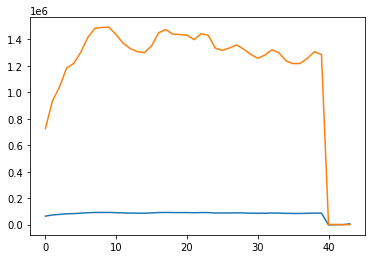

In [68]:
import matplotlib.pyplot as plt

plt.plot(f[1][0])
plt.plot(f[1][1])
plt.show()